In [118]:
# Imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from datetime import datetime, timezone
from collections import Counter


In [ ]:
# Load Data into Panda Dataframe

file_path = '2023-04-26_4_18_56 PM_Apple Watch.csv'

df = pd.read_csv(file_path, engine='python')

df.head(10)

In [178]:
# Get X,Y,Z Data
x_data = df["accelerometerAccelerationX(G)"]
y_data = df["accelerometerAccelerationY(G)"]
z_data = df["accelerometerAccelerationZ(G)"]

In [201]:
# Obtain Elapsed Time

df['timestamp'] = pd.to_datetime(df["loggingTime(txt)"])

df['elapsed_time'] = pd.to_timedelta(df['elapsed_time'])
df['elapsed_time'] = df['elapsed_time'].fillna(pd.Timedelta(seconds=0))
df['cumulative_elapsed_seconds'] = df['elapsed_time'].cumsum().dt.total_seconds()


In [210]:
# Resample dataframe at X second intervals

freq = 1

df['timestamp'] = pd.to_datetime(df["loggingTime(txt)"])

# Set the "timestamp" column as the dataframe index
df.set_index('timestamp', inplace=True)

# Downsample the dataframe to a lower frequency within each interval
downsampled_df = df.resample(str(freq)+'S').mean()
df_without_nan_downsampled_df = df.dropna(axis=1)

In [211]:
# New downsampled time series data

new_x_data = downsampled_df["accelerometerAccelerationX(G)"]
new_y_data = downsampled_df["accelerometerAccelerationY(G)"]
new_z_data = downsampled_df["accelerometerAccelerationZ(G)"]

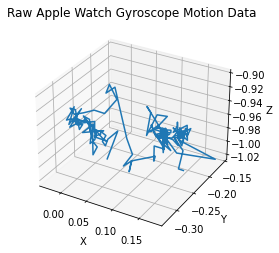

In [212]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_data, y_data, z_data)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.set_title('Raw Apple Watch Gyroscope Acceleration Data')

plt.show()

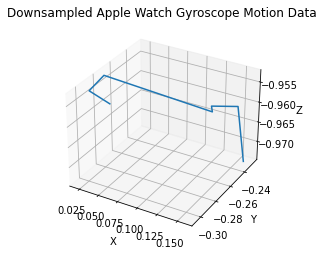

In [213]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(new_x_data, new_y_data, new_z_data)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.set_title('Downsampled Apple Watch Gyroscope Acceleration Data')

plt.show()

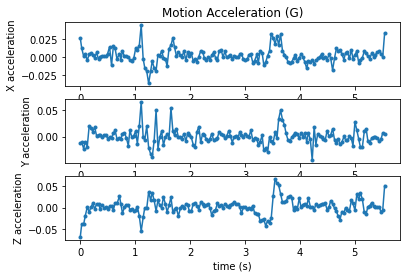

In [204]:
# Acceleration Data 


time = df['cumulative_elapsed_seconds']
x_accel = df["motionUserAccelerationX(G)"]
y_accel = df["motionUserAccelerationY(G)"]
z_accel = df["motionUserAccelerationZ(G)"]

plt.subplot(3, 1, 1)
plt.plot(time, x_accel, '.-')
plt.title('Motion Acceleration (G)')
plt.ylabel('X acceleration')

plt.subplot(3, 1, 2)
plt.plot(time, y_accel, '.-')
plt.xlabel('time (s)')
plt.ylabel('Y acceleration')

plt.subplot(3, 1, 3)
plt.plot(time, z_accel, '.-')
plt.xlabel('time (s)')
plt.ylabel('Z acceleration')

plt.show()

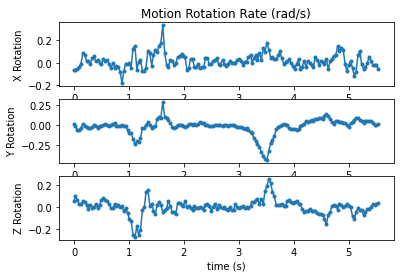

In [221]:
# Rotation Data 


time = df['cumulative_elapsed_seconds']
x_accel = df["motionRotationRateX(rad/s)"]
y_accel = df["motionRotationRateY(rad/s)"]
z_accel = df["motionRotationRateZ(rad/s)"]

plt.subplot(3, 1, 1)
plt.plot(time, x_accel, '.-')
plt.title('Motion Rotation Rate (rad/s)')
plt.ylabel('X Rotation')

plt.subplot(3, 1, 2)
plt.plot(time, y_accel, '.-')
plt.xlabel('time (s)')
plt.ylabel('Y Rotation')

plt.subplot(3, 1, 3)
plt.plot(time, z_accel, '.-')
plt.xlabel('time (s)')
plt.ylabel('Z Rotation')

plt.show()

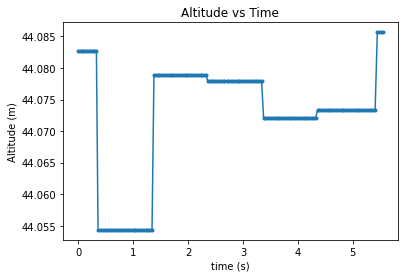

In [219]:
# Golf Swing 

altitude = df["locationAltitude(m)"]

plt.plot(time, altitude, '.-')
plt.xlabel('time (s)')
plt.ylabel('Altitude (m)')
plt.title('Altitude vs Time')
plt.show()

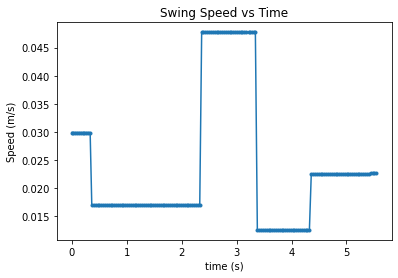

In [220]:
# Speed vs Time 

speed = df["locationSpeed(m/s)"]

plt.plot(time,speed, '.-')
plt.xlabel('time (s)')
plt.ylabel('Speed (m/s)')
plt.title('Swing Speed vs Time')
plt.show()



In [218]:
# Correlation between acceleration in the Y direction and latitude

correlation = df['accelerometerAccelerationY(G)'].corr(df['locationLatitude(WGS84)'])

print("Correlation between acceleration in the Y and latitude:", correlation)

Correlation between acceleration and latitude: -0.8327269224921477


In [ ]:
# import ipywidgets as widgets
# from mpl_toolkits import mplot3d
# import numpy as np
# import matplotlib.pyplot as plt



# length_iter = list(range(len(x_data)))

# def movement(t):
#     fig = plt.figure(figsize=(5,5))
#     ax = plt.axes(projection ='3d')
#     ax.plot3D(x_data[t],y_data[t],z_data[t],'red')
#     plt.show()
# widgets.interact(movement , t= widgets.Play(min=0, max=len(x_data)-1));



In [134]:
# # Determine Sampling Frequency


# date_strings = df["loggingTime(txt)"]

# data_points = [datetime.strptime(date_string, '%Y-%m-%dT%H:%M:%S.%f%z') for date_string in date_strings]


# # Time differences between consecutive data points
# time_diffs = [(data_points[i+1] - data_points[i]).total_seconds() for i in range(len(data_points)-1)]

# # Most common time difference
# most_common_diff = Counter(time_diffs).most_common(1)[0][0]

# # Frequency
# print(most_common_diff)

0.035
